In [1]:
import pandas as pd
from matplotlib.ticker import ScalarFormatter

d = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
d_eu = d[d['Country/Region'].isin(['Germany','Spain','Italy','France','Portugal','Austria','Switzerland','Netherlands','Belgium','Luxembourg','Denmark']) & d['Province/State'].isnull()]
d_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
pop_data = pd.read_csv('https://stats.oecd.org/sdmx-json/data/DP_LIVE/.POP.TOT.MLN_PER.A/OECD?contentType=csv&detail=code&separator=comma&csv-lang=en&startPeriod=2018')
columns = ['319 Mil = DE,FR,IT,ES,NL,BE,PT,AU,CH,DK,LU','327 Mil in US']
eu_series = d_eu.iloc[:,4:].sum()
us_series = d_us.iloc[:,12:].sum()

In [15]:
eu_pop = pop_data[pop_data['LOCATION'].isin(['USA','DEU','ESP','ITA','FRA','PRT','AUT','CHE','NLD','BEL','LUX','DNK'])]
eu_pop.loc['Total']= eu_pop.sum(numeric_only=True)
eu_pop

C:\Users\Jonathan\Anaconda3\envs\scraping\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1,AUT,POP,TOT,MLN_PER,A,2018.0,8.837707,NaN
2,BEL,POP,TOT,MLN_PER,A,2018.0,11.403740,NaN
5,DNK,POP,TOT,MLN_PER,A,2018.0,5.789957,NaN
7,FRA,POP,TOT,MLN_PER,A,2018.0,66.941698,NaN
8,DEU,POP,TOT,MLN_PER,A,2018.0,82.914191,NaN
13,ITA,POP,TOT,MLN_PER,A,2018.0,60.421797,NaN
16,LUX,POP,TOT,MLN_PER,A,2018.0,0.607950,NaN
18,NLD,POP,TOT,MLN_PER,A,2018.0,17.231622,NaN
22,PRT,POP,TOT,MLN_PER,A,2018.0,10.283822,NaN
24,ESP,POP,TOT,MLN_PER,A,2018.0,46.733038,NaN


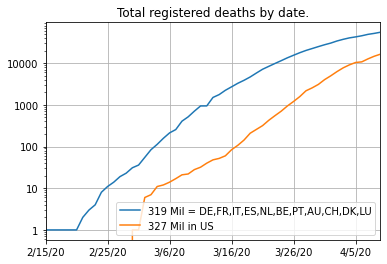

In [4]:
combined_date = eu_series.to_frame(name='EU').join(us_series.to_frame(name='US'))
ax = combined_date.iloc[24:].plot.line(logy=True,title='Total registered deaths by date.',grid = True)
ax.legend(columns)
ax.yaxis.set_major_formatter(ScalarFormatter())

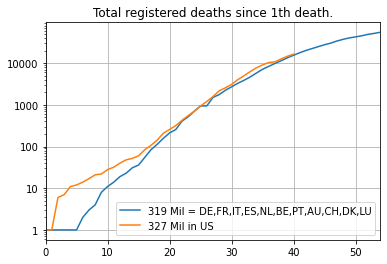

In [17]:
starting = 0
combined_cases = pd.concat([eu_series[eu_series > starting].reset_index(drop=True),us_series[us_series > starting].reset_index(drop=True)],axis=1,sort=False)
combined_cases.columns = columns
ax = combined_cases.plot.line(logy=True,title="Total registered deaths since {}th death.".format(starting+1),grid = True)
ax.yaxis.set_major_formatter(ScalarFormatter())
# for axis in [ax.xaxis, ax.yaxis]:
#     axis.set_major_formatter(ScalarFormatter())

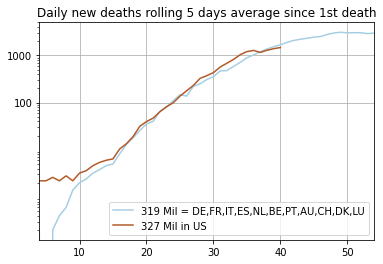

In [20]:
roll_length = 5
combined_cases_inc = combined_cases.diff().fillna(combined_cases).rolling(roll_length).mean()
ax = combined_cases_inc.iloc[roll_length-1:].plot.line(logy=True,title='Daily new deaths rolling {} days average since 1st death'.format(roll_length),grid=True,colormap='Paired',yticks=[100,1000])
ax.yaxis.set_major_formatter(ScalarFormatter())

In [45]:
combined_cases_inc

,"319 Mil = DE,FR,IT,ES,NL,BE,PO,AU,CH,DK,LU",327 Mil in US
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,0.285714,2.000000
7,0.285714,2.285714
8,0.428571,2.857143
9,1.000000,2.285714
